___
# Ciência dos Dados - PROJETO 1

## Lúcia Coelho Richardson

### Projeto 1

___
## Introdução
Por meio desse trabalho eu viso analisar como as diversas faixas salariais influenciam ao acesso a internet e consequentemente as taxas de conectividade que os indivíduos nos estados terão. A conectividade é uma variável que é definida pelo quanto mais a população de cada região está conectada a internet, por meio de critérios que serão explicitados durante o trabalho. Com o objetivo ainda de demonstrar, por meio de tabelas e gráficos, qual é a escolha do meio ou dos meios de acesso a internet baseado nas vantagens desses, como viabilidade economica (dentro da renda media), praticidade de acordo com cada região e até mentalidade.

___
## Análise e Resultados - 2015

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')
from numpy import zeros_like

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Music\Ciencia-dos-Dados-2017.2\CD17\Projeto1


In [3]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2015.csv',sep=',')

In [4]:
#escolhendo as variaveis na base de dados e retirada dos nulos
escolha_var = dados.loc[:,["UF","V02324","V4622", "V02424", "V02425", "V02426", "V4621"]] 

dados_nao_nulos = escolha_var[pd.notnull(escolha_var.V02324)]
dados_nao_nulos = dados_nao_nulos[pd.notnull(dados_nao_nulos.V4622)]
dados_nao_nulos = dados_nao_nulos[pd.notnull(dados_nao_nulos.V02324)]
dados_nao_nulos= dados_nao_nulos[dados_nao_nulos.V4621!=999999999999.0]

dados = dados_nao_nulos

___
### Desenvolvimento

Nessa etapa do projeto foi onde realizei a:

-A organização de todas minhas variáveis de interesse 

-Separacao em relação ao nivel de conectividade, para que por meio das informações obtidas fosse possível avaliar, e até comparar as regiões do Brasil e seu acesso/ utilização de cada um dos "meios" de acesso a internet, e a interligação entre elas. Os quais são:

Discada, que indica uma baixa conexão devido ser um método antiquadro e não tão vantajoso de acesso a internet.

Banda Larga, que indica uma média conexão, devido ser um método ainda muito utilizado de acesso a internet, porém limitado se comparado ao 3G e 4G, por não ser uma tecnologia móvel, por exemplo.

3G, 4G: que indica uma média razoável, devido ser é a terceira geração da tecnologia que permite acessar a internet com o celular e se caracterizar como uma tecnologia móvel. 

E a partir da associação dessas, estabelece-se maiores níveis de conectividade que seriam tais juntas. Uma vez que a boa conexao seria uma união entre a banda larga e discada, uma ótima conexão seria a união entre a internet discada e o 3g/4g. Somado a isso, o tipo de conexão excelente seria a associação entre a internet 3g/4g e a banda larga. E por último o tipo de conexão excepcional seria a associação entre todos os tipos citados anteriormente. 

-A divisão dos estados conforme as regiões para conseguir ter diferentes análises gráficas interessantes

-A divisão conforme renda das faixas salariais, também analisadas


In [5]:
#divisao em estados para melhor organizacao e chegar ao meu objetivo no projeto
dados.UF = dados.UF.astype("int")
dados.loc[dados.UF >=50, "Regiao"] = "Centro-Oeste"
dados.loc[(dados.UF >= 41) & (dados.UF <= 43), "Regiao"] = "Sul"
dados.loc[(dados.UF >= 31) & (dados.UF <= 35), "Regiao"] = "Sudeste"
dados.loc[(dados.UF >= 11) & (dados.UF <= 17), "Regiao"] = "Norte"
dados.loc[(dados.UF >= 21) & (dados.UF <= 29), "Regiao"] = "Nordeste"

In [6]:
dados.loc[dados.V02425 == 2, "Conectividade"] = "Baixa conexao (Discada)" #só discada
dados.loc[dados.V02426 == 2, "Conectividade"] = "Media conexao (Banda Larga)" #só banda larga
dados.loc[dados.V02424 == 2, "Conectividade"] = "Razoavel conexao (3G e 4G)" # só 3g4g
dados.loc[(dados.V02425 == 2)&(dados.V02426 == 2), "Conectividade"] = "Boa conexao (Banda larga e discada)" 
dados.loc[(dados.V02425 == 2)&(dados.V02424 == 2), "Conectividade"] = "Otima conexao (Discada e 3g4g)"
dados.loc[(dados.V02426 == 2)&(dados.V02424 == 2), "Conectividade"] = "Excelente conexao (3g4g e banda larga)"
dados.loc[(dados.V02426 == 2)&(dados.V02425 == 2)& (dados.V02424 == 2), "Conectividade"] = "Excepcional conexao (todas)" #todas

In [7]:
#renomeando as categorias para facilitar na analise dos dados
#renomeando as "linhas"
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])
dados.V02324 = dados.V02324.astype('category')
dados.V02324.cat.categories=["Sim", "Não"]
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories=["Sim", "Não"]
dados.V02425 = dados.V02425.astype('category')
dados.V02425.cat.categories=["Sim", "Não"]
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories=["Sim", "Não"]
dados.V4622 = dados.V4622.astype('category')
#dados.V4622
dados.V4622.cat.categories=["sem rendimento","1/4 do salario minimo", "entre 1/2 e 1/4 do salario minimo", "mais de 1/2 salario minimo", "entre 1 e 2 salarios minimos", "entre 2 e 3 salarios minimos", "entre 3 e 5 salarios minimos", "mais de 5 salarios minimos"]


In [8]:
#renomei as colunas principais 
renomear = dados.rename(columns = {"UF": "Estados", "V02324": "Acesso a internet via celular", "V4622":"Salario", "V02424":"Internet via 3G e 4G", "V02425":"Internet via conexao discada", "V02426":"Internet via banda larga", "V4621": "Renda"}) #
renomear


,Estados,Acesso a internet via celular,Salario,Internet via 3G e 4G,Internet via conexao discada,Internet via banda larga,Renda,Regiao,Conectividade
2,Rondônia,Não,entre 1 e 2 salarios minimos,Sim,Não,Sim,1150.0,Norte,Excelente conexao (3g4g e banda larga)
3,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,793.0,Norte,Excelente conexao (3g4g e banda larga)
5,Rondônia,Não,entre 2 e 3 salarios minimos,Não,Não,Sim,1990.0,Norte,Media conexao (Banda Larga)
8,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,818.0,Norte,Excelente conexao (3g4g e banda larga)
10,Rondônia,Sim,entre 2 e 3 salarios minimos,Sim,Não,Sim,1716.0,Norte,Excelente conexao (3g4g e banda larga)
11,Rondônia,Sim,entre 3 e 5 salarios minimos,Sim,Não,Sim,2500.0,Norte,Excelente conexao (3g4g e banda larga)
13,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,1400.0,Norte,Excelente conexao (3g4g e banda larga)
15,Rondônia,Sim,mais de 1/2 salario minimo,Sim,Não,Sim,666.0,Norte,Excelente conexao (3g4g e banda larga)
17,Rondônia,Sim,mais de 1/2 salario minimo,Não,Não,Sim,750.0,Norte,Media conexao (Banda Larga)
18,Rondônia,Sim,entre 1 e 2 salarios minimos,Não,Não,Sim,1437.0,Norte,Media conexao (Banda Larga)


###### Criacao de tabelas e gráficos conforme cada regiao do Brasil, que possibilita uma analise macro das taxas de conectividade por regiao e sua relacao com a renda


In [49]:

#tabela sudeste
tabelasudeste= renomear[renomear.Regiao=='Sudeste']
Renda_cat = pd.cut(tabelasudeste.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100


(197, 731]      33.651894
(731, 1265]     31.631592
(1265, 1799]    15.469176
(1799, 2333]     8.546670
(2333, 2867]     4.728893
(2867, 3401]     3.713791
(3401, 3935]     2.257985
Name: Renda, dtype: float64

In [50]:
#tabela sul
tabelasul= renomear[renomear.Regiao=='Sul']
Renda_cat = pd.cut(tabelasul.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100


(197, 731]      25.508858
(731, 1265]     32.444403
(1265, 1799]    18.563890
(1799, 2333]    10.525820
(2333, 2867]     6.181681
(2867, 3401]     4.476065
(3401, 3935]     2.299284
Name: Renda, dtype: float64

In [51]:
#tabela norte
tabelanorte= renomear[renomear.Regiao=='Norte']
Renda_cat = pd.cut(tabelanorte.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      50.084579
(731, 1265]     26.769101
(1265, 1799]    10.248097
(1799, 2333]     6.019171
(2333, 2867]     3.312659
(2867, 3401]     2.086270
(3401, 3935]     1.480124
Name: Renda, dtype: float64

In [52]:
#tabela nordeste
tabelanordeste= renomear[renomear.Regiao=='Nordeste']
Renda_cat = pd.cut(tabelanordeste.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      53.887496
(731, 1265]     25.797205
(1265, 1799]     9.057685
(1799, 2333]     4.772483
(2333, 2867]     3.002508
(2867, 3401]     2.278753
(3401, 3935]     1.203870
Name: Renda, dtype: float64

In [53]:
#tabela centro-oeste
tabelacentro = renomear[renomear.Regiao=='Centro-Oeste']
Renda_cat = pd.cut(tabelacentro.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      32.587178
(731, 1265]     31.323283
(1265, 1799]    15.060149
(1799, 2333]     9.334552
(2333, 2867]     5.040353
(2867, 3401]     4.126694
(3401, 3935]     2.527790
Name: Renda, dtype: float64

### Tabelas de renda media comparando a renda media de todo o pais e a renda das Regiões desse

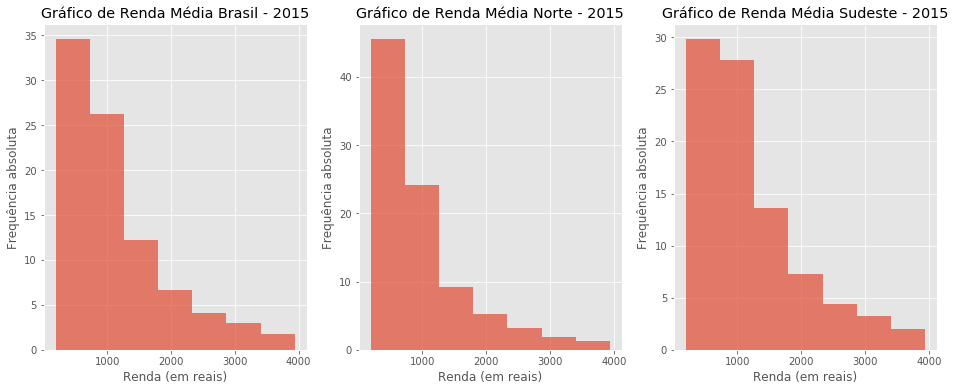

In [73]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(131)
faixa = range(197,3940,534) #1/4 sal min = 197// mais de 5 sal min = 3941// isso tuod dividido em 4 faixas
plot = renomear.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Brasil - 2015', weights=zeros_like(renomear.Renda)+1./renomear.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')

plt.subplot(132)
plot = tabelanorte.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Norte - 2015', weights=zeros_like(tabelanorte.Renda)+1./tabelanorte.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



plt.subplot(133)
plot = tabelasudeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sudeste - 2015', weights=zeros_like(tabelasudeste.Renda)+1./tabelasudeste.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



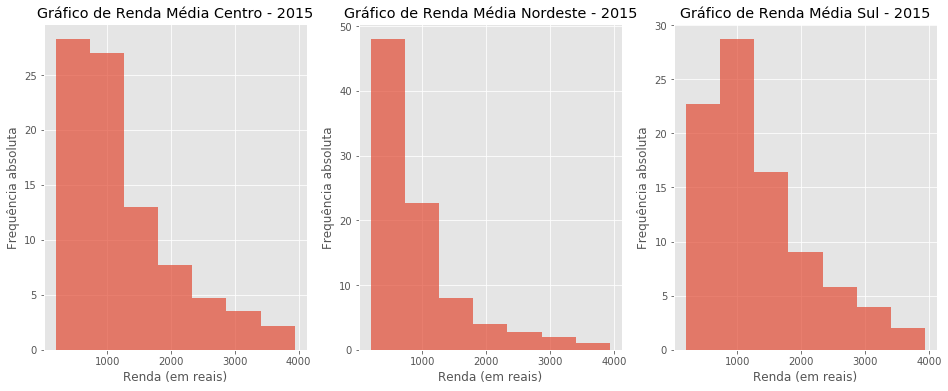

In [75]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(131)
faixa = range(197,3940,534) #1/4 sal min = 197// mais de 5 sal min = 3941// isso tuod dividido em 4 faixas


plot = tabelacentro.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Centro - 2015', weights=zeros_like(tabelacentro.Renda)+1./tabelacentro.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')

plt.subplot(132)

plot = tabelanordeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Nordeste - 2015', weights=zeros_like(tabelanordeste.Renda)+1./tabelanordeste.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



plt.subplot(133)
plot = tabelasul.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sul - 2015', weights=zeros_like(tabelasul.Renda)+1./tabelasul.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



In [76]:
#tabelasul

#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#plot = tabelasul.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sul - 2015', weights=zeros_like(tabelasul.Renda)+1./tabelasul.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [77]:
#tabelanorte
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelanorte.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelanorte.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Norte - 2015', weights=zeros_like(tabelanorte.Renda)+1./tabelanorte.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [78]:
#tabelanordeste
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelanordeste.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelanordeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Nordeste - 2015', weights=zeros_like(tabelanordeste.Renda)+1./tabelanordeste.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [79]:
#tabelacentro
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelacentro.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelacentro.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Centro - 2015', weights=zeros_like(tabelacentro.Renda)+1./tabelacentro.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [80]:
#tabelasudeste
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelasudeste.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelasudeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sudeste - 2015', weights=zeros_like(tabelasudeste.Renda)+1./tabelasudeste.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

##### Esse gráfico seria uma complementariedade e uma definicão de limites que meu trabalho detem, já que pelas rendas se basearem nas faixas salariais em busca de criar gráficos com mais sentido entre si, a partir desse boxplot nota-se que ainda possui uma porcentagem, aqui como exemplo na região sudeste que possui uma renda mensal em um valor superior ao estabelecido, acima de 5 salários minimos, demonstrando as restricoes de variaveis feitas no projeto para que fosse possivel chegar a uma conclusão mais exata.

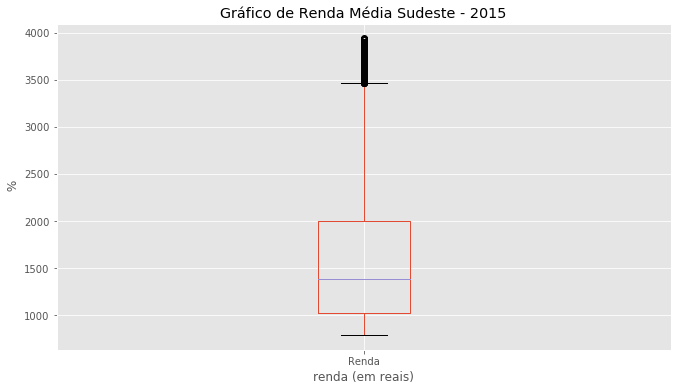

In [16]:
#plotando em boxplot

#tabelasudeste

renda_box = tabelasudeste.Renda[(tabelasudeste.Renda < 3940) & (tabelasudeste.Renda > 788)]



fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
plot = renda_box.plot(kind = "box", title='Gráfico de Renda Média Sudeste - 2015')

plt.ylabel(' %')
plt.xlabel('renda (em reais)')

#consistente c a escolha c salarios minimos


In [82]:
cruzamento_5 = pd.crosstab(renomear["Salario"], renomear["Internet via 3G e 4G"], normalize="index")
cruzamento_7 = pd.crosstab(renomear["Salario"], renomear["Internet via banda larga"], normalize="index")
cruzamento_8 = pd.crosstab(renomear["Salario"], renomear["Internet via conexao discada"], normalize="index")


In [130]:
cruzamento_5*100

Internet via 3G e 4G,Sim,Não
Salario,,
sem rendimento,75.528701,24.471299
1/4 do salario minimo,76.485788,23.514212
entre 1/2 e 1/4 do salario minimo,74.115128,25.884872
mais de 1/2 salario minimo,71.722941,28.277059
entre 1 e 2 salarios minimos,69.135927,30.864073
entre 2 e 3 salarios minimos,68.358832,31.641168
entre 3 e 5 salarios minimos,68.729817,31.270183
mais de 5 salarios minimos,73.694243,26.305757


In [131]:
cruzamento_7*100

Internet via banda larga,Sim,Não
Salario,,
sem rendimento,67.371601,32.628399
1/4 do salario minimo,40.956072,59.043928
entre 1/2 e 1/4 do salario minimo,49.111979,50.888021
mais de 1/2 salario minimo,61.112044,38.887956
entre 1 e 2 salarios minimos,73.056213,26.943787
entre 2 e 3 salarios minimos,81.988873,18.011127
entre 3 e 5 salarios minimos,87.011123,12.988877
mais de 5 salarios minimos,90.144872,9.855128


In [132]:
cruzamento_8*100

Internet via conexao discada,Sim,Não
Salario,,
sem rendimento,5.438066,94.561934
1/4 do salario minimo,2.325581,97.674419
entre 1/2 e 1/4 do salario minimo,2.279884,97.720116
mais de 1/2 salario minimo,3.096478,96.903522
entre 1 e 2 salarios minimos,3.417040,96.582960
entre 2 e 3 salarios minimos,3.810848,96.189152
entre 3 e 5 salarios minimos,3.265160,96.734840
mais de 5 salarios minimos,2.382768,97.617232


### Interpretação conexões e opcões escolhidas conforme as faixas salariais 


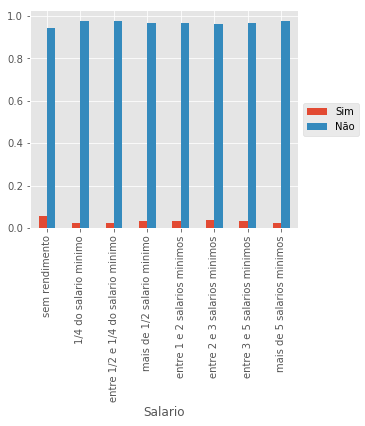

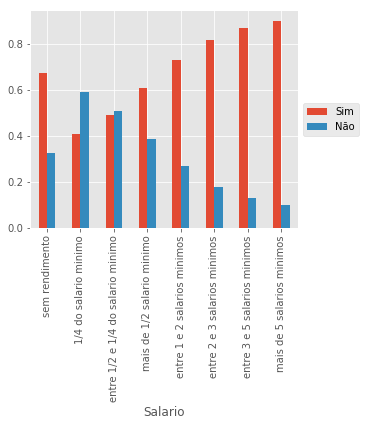

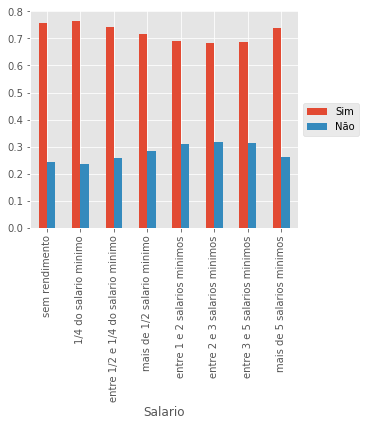

In [142]:
#grafico qualitativo/quant que indica o acesso a internet 3G e 4G e a internet banda larga 
#pois as taxas para obtenção do serviço ainda são consideravelmente altas e a área de cobertura é relativamente restrita, principalmente para certos locais com uma infraestrutura mais precoce.
#Assim é possível notar que a internet banda larga é ainda a mais optada no pais por suas inúmeras vantagens, e nas faixas salariais mais altas é , mas 


cruzamento_8.plot(kind="bar")

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

cruzamento_7.plot(kind="bar")

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

cruzamento_5.plot(kind="bar")

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [128]:
#conectividade x regiao
cruzamento_2 = pd.crosstab(dados["Regiao"], dados["Conectividade"], normalize="index") 
#cruzamento_2*100

In [127]:
#salario x regiao
cruzamento_1 = pd.crosstab( renomear["Salario"], renomear["Regiao"],normalize="index") 
#cruzamento_1*100

In [126]:
#salario x conectividade
cruzamento = pd.crosstab(renomear["Salario"], renomear["Conectividade"], normalize="index") 
    
#cruzamento*100


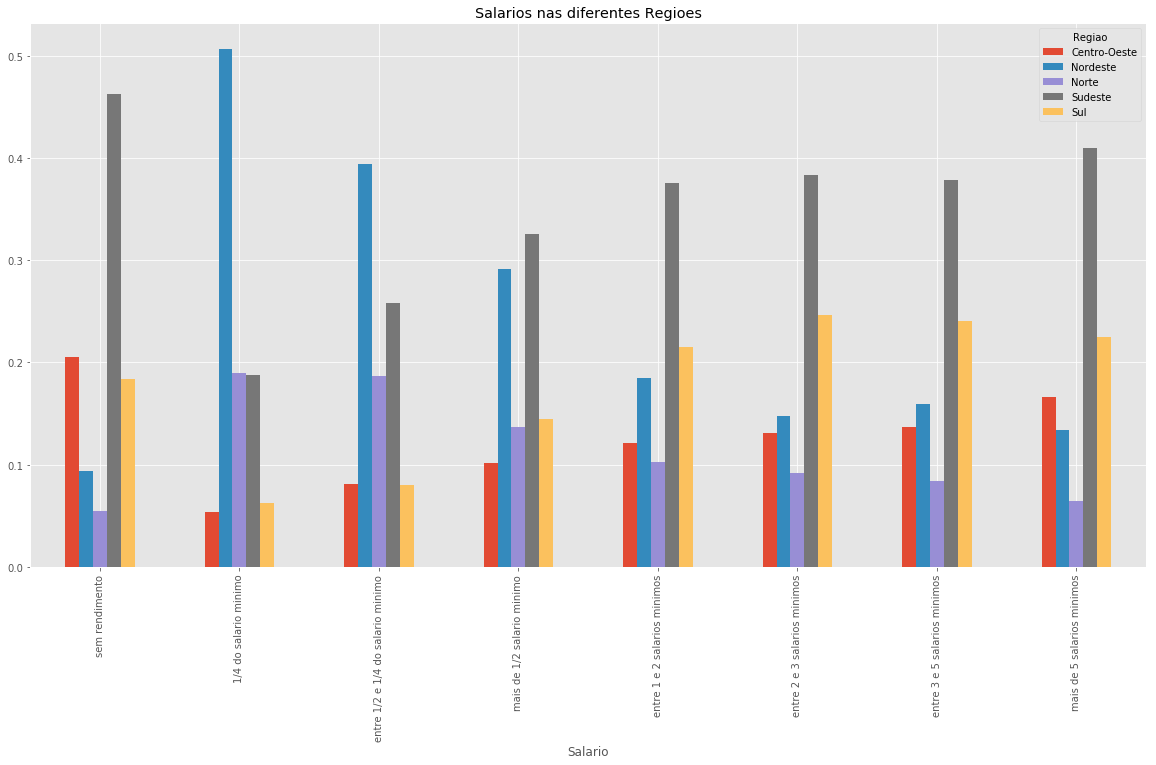

In [183]:
cruzamento_1.plot(kind="bar", figsize = (20,10), title = "Salarios nas diferentes Regioes")


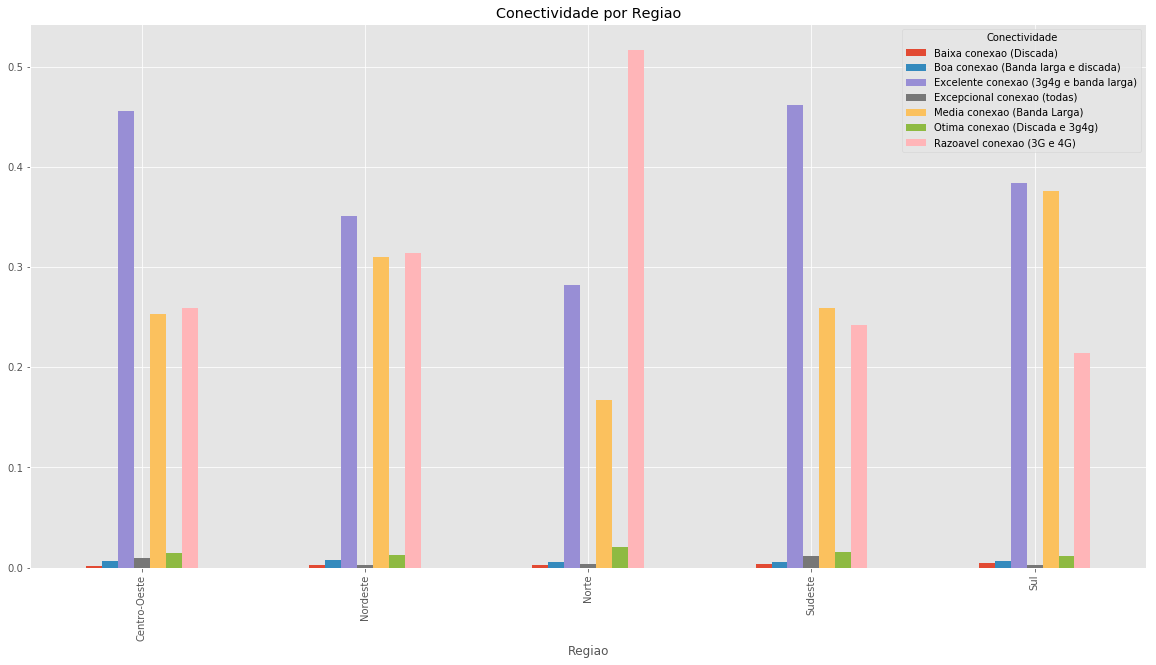

In [124]:
cruzamento_2.plot(kind="bar",figsize = (20,10), title = "Conectividade por Regiao")

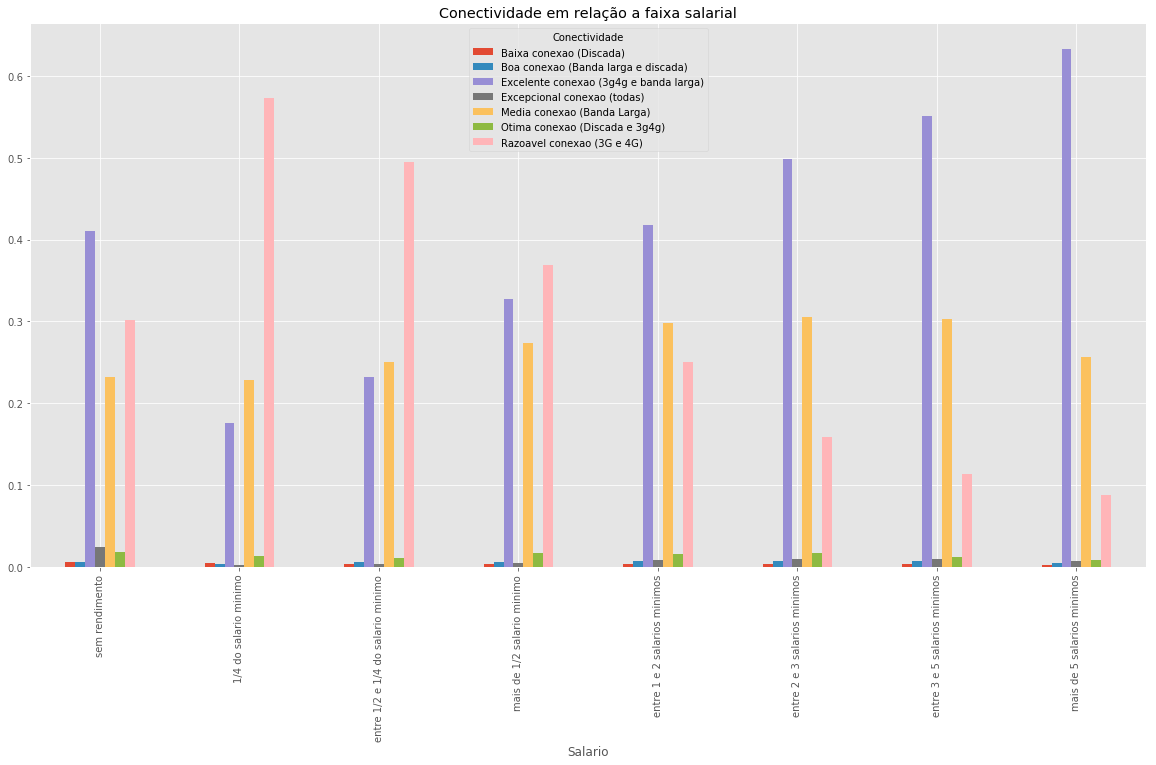

In [143]:
###############################################################IMPORT######################

cruzamento.plot(kind="bar",figsize = (20,10), title = "Conectividade em relação a Faixa Salarial")

#da para perceber com a tabela que a partir de quando a pessoa ganha mais que 0.5 salario minimo 
#seu investimento com a conectividade aumenta e passa de separadamente sair de apenas 1 tipo de conectividade para mais que um 
#o que mais se destaca é o de banda larga e 3g4g (custo mais alto) que cresce cerca de 10"pontos" a mais que comparado 
#a faixa salarial anterior, porem a opcao por apenas 1 apesar de decrescer bastante ainda é bem alta 
#ja quando a populacao tem acesso a mais de 1(ate 2)salarios e entre 2 e 3 é notavel grandes saltos de "conectividade" porem a 
#opcao apenas pela banda larga continua sendo "viavel" pelo que demonstra os dados

In [172]:
cruzamento_3 * 100
#x.describe()

#cruzamento_3.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (5,10),layout=(2,1), autopct="%0.2f",legend=False)
#cruzamento da faixa salarial com o nivel de conectividade




Internet via banda larga,Sim,Não
Salario,,
sem rendimento,67.371601,32.628399
1/4 do salario minimo,40.956072,59.043928
entre 1/2 e 1/4 do salario minimo,49.111979,50.888021
mais de 1/2 salario minimo,61.112044,38.887956
entre 1 e 2 salarios minimos,73.056213,26.943787
entre 2 e 3 salarios minimos,81.988873,18.011127
entre 3 e 5 salarios minimos,87.011123,12.988877
mais de 5 salarios minimos,90.144872,9.855128


In [171]:
#cruzamento_3 * 100
#cruzamento_3.plot

#cruzamento_4 * 100
#cruzamento_4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet 3G,4G por salario")
#plt.plot()


In [157]:
cruzamento_3 = pd.crosstab(renomear["Salario"], renomear["Internet via banda larga"], normalize="index")
cruzamento_4 = pd.crosstab(renomear["Salario"], renomear["Internet via 3G e 4G"], normalize="index")

#cruzamento da faixa salarial com relacao a Internet via banda larga, o que demonstra que quanto maior poder aquisitivo 
#maior o acesso a banda larga 
cruzamento3 = (cruzamento_3["Sim"]*100)
cruzamento4 = (cruzamento_4["Sim"]*100)
#cruzamento_4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet 3G,4G por salario")
#plt.plot()

#### Porcentagem de internet banda larga por faixa salarial

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B99619CCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B9964A3898>]], dtype=object)

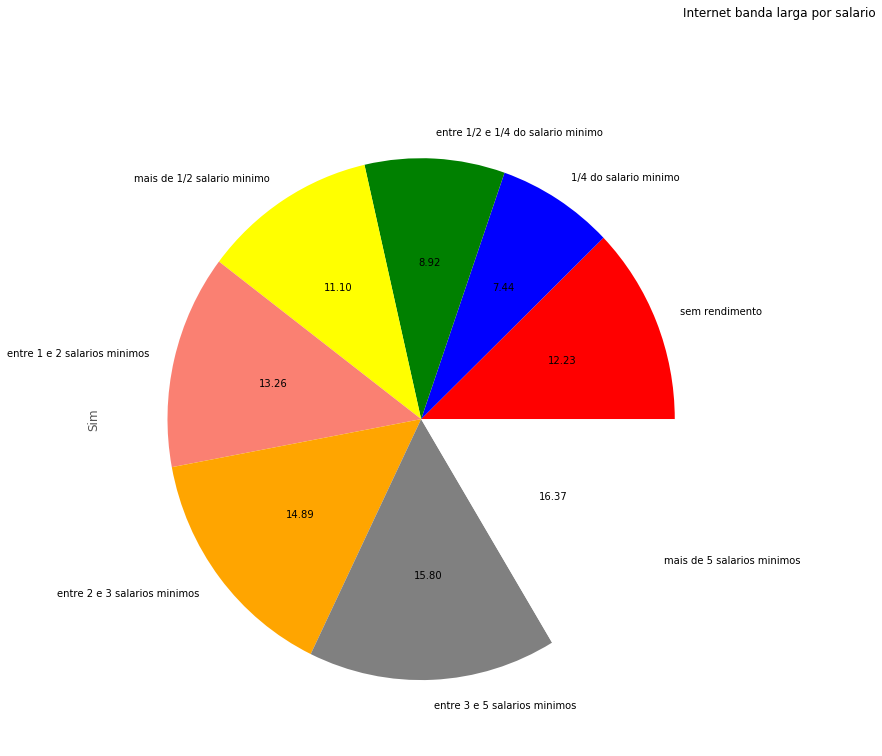

In [179]:
cruzamento3.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet banda larga por salario")



#plt.plot()
#.plot(kind="pie", title = "Gráfico de Faixa Salarial por Internet Banda Larga")

#### Porcentagem de internet 3G/4G por faixa salarial

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9957E8748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B995857978>]], dtype=object)

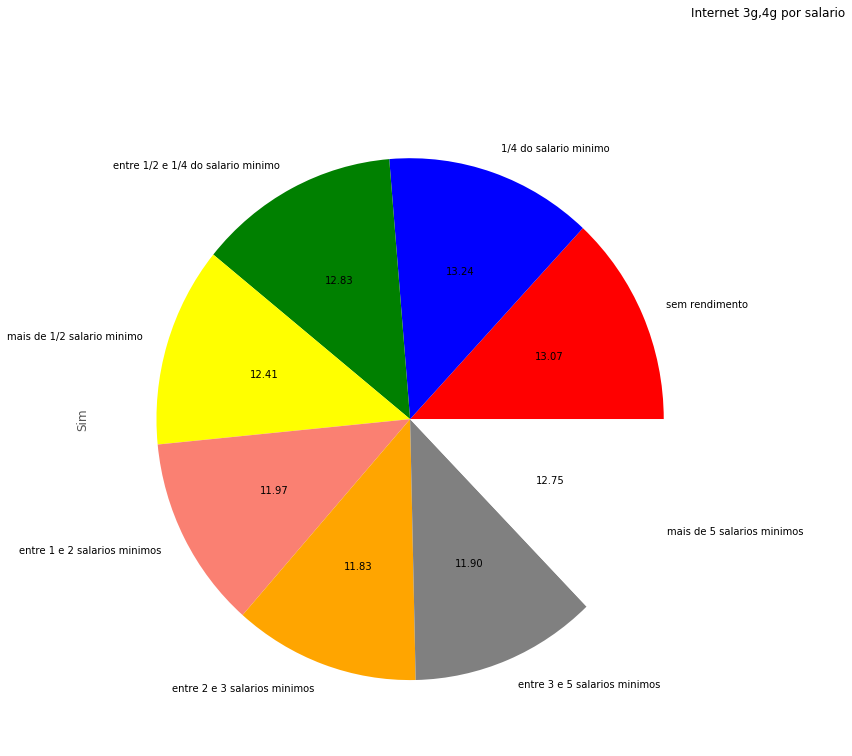

In [169]:
cruzamento4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet 3g,4g por salario")
#Internet 3g,4g por salario

In [173]:
#(cruzamento_4["Sim"]*100).plot(kind="pie", title = "Gráfico de Faixa Salarial por 3g/4g")

In [32]:
dados["Conectividade"].value_counts()  

Excelente conexao (3g4g e banda larga)    26488
Razoavel conexao (3G e 4G)                19160
Media conexao (Banda Larga)               18618
Otima conexao (Discada e 3g4g)              971
Excepcional conexao (todas)                 450
Boa conexao (Banda larga e discada)         422
Baixa conexao (Discada)                     223
Name: Conectividade, dtype: int64

In [35]:
renomear.to_csv("Resumo.csv")                        #criando o arq no excel

___
## Conclusão 

Por meio desse trabalho tenho o objetivo de demonstrar a ligacao dos niveis de conectividade e sua interligação com as diferentes faixas salariais, tantos nas diferentes regiões do país como nele como um todo. Ainda por meio desse busco comprovar que a opção pelo meio ou dos meios de acesso a internet pautado em fatores como renda, viabilidade na regiao, além de praticidade e fatores discutidos durante as conclusões abaixo.

### Interpretação conexões e opcões escolhidas conforme as faixas salariais 

A partir da análise dos gráficos nota-se que a internet discada nao é mais uma opcao entre a maioria das faixas de renda no Brasil, uma vez que por ser antiquadra e necessitar de uma linha telefônica para transmitir os dados, acaba sendo muito mais inviável e lenta. Enquanto isso, a banda larga usa diferentes sistemas, além do telefônico, que permitem transmissões muito mais velozes. Já a conexão 3G/4G não a necessidade de fios; por se tratar de uma tecnologia móvel e é bem potente, e compete fielmente com a internet banda larga e que tende no futuro breve a até substitui-la permanentemente, já que apresenta maior aceitação já na maioria das faixas salariais, em cerca de 70% de quase todas as faixas salariais possuem. 

### Histogramas
Como é possível notar por meio da análise dos histogramas, a renda média do país inteiro seria uma associação ou até poderiamos dizer uma média entre as rendas mensais das regiões Sudeste e Norte, o que demonstra um fenômeno importante já que a tendencia das rendas dessas duas regiões é serem terem uma grande quantidade de individuos com rendas associadas os valores mais baixos, pela grande pobreza e marginalização de ainda grande parte da sociedade e uma pequena parcela da sociedade com uma boa qualidade de vida com salários ainda não tão elevados, porém bem superiores ao restante da sociedade naquela região, cerca de apenas 2% da população. E, a partir dos outros gráficos de renda media mensal nas outras regiões (Centro-Oeste, Nordeste e Sul) é notável que há grandes disparidades de distribuição de renda, principalmente no Nordeste com cerca de 55% da população ganhando na faixa de 1/4 do salário mínimo, e tendo que viver muito precariamente com isso, uma condição bem diferente do sul por exemplo em que menos de 25% da população se encontra com essas medias salariais. Informacao a qual comprova que os níveis de conectividade são em grande parte das vezes muito desproporcionais nos diferentes estados.

Já gráficos de renda media nas regioes do Centro-Oeste e Sul possuem uma tendencia parecida na segunda faixa salarial, que engloba praticamente a maior parcela da populacao desses estados (cerca de 31%), e se caracteriza por ser entre mais que 1/4 de salário mínimo mas menos que 1/2 salário mínimo, demonstrando que a renda da populacão acaba sendo não tão elevada, mas a priorização pela tecnologia e conectividade é uma tendencia nos últimos tempos.


### Gráficos de Barras em relação a 
#### - Salarios nas diferentes regioes
#### - Conectividade por Regiao
#### - Conectividade em relação a Faixa Salarial

A partir da análise do gráfico de Salarios nas diferentes regiões nota-se que os menores salários estão na região Nordeste, mas que mesmo essa tendo esses salários menores ela possui por exemplo uma infraestrutura mais elaborada que na regiao Norte a opção pela utilizacao tanto da internet banda larga como do 3g/4g em conjunto é maior que na regiao Nordeste. Já se levarmos em conta a média salarial e a questão da conectividade nas outras regioes do país, a media salarial no Sul por exemplo não é tão elevada, é bem distribuida até nas faixas salariais mas a sua conectividade é excelente, assim como também ocorre no Centro-Oeste. Dando para notar que a em partes a cultura e outros fenomenos externos como infraestrutura tem grande infuência na mentalidade das pessoas e no nível de priorização que essas dão a questão da conectividade.


A partir do gráfico de Conectividade em relação a Faixa Salarial nota-se que o estilo de vida dos habitantes no Sudeste e Centro-Oeste é mais conectado, caracterizando-se por uma excelente conexao unindo na sua rotina a utilizacao de ambas as conexoes de internet via banda larga e 3g/4g. Porém ambas ainda competem entre si pelo maior espaço em relação ao meio como se faz o acesso a internet, e a opção por 3g e 4g cada vez mais aumenta. Mas é possível notar por meio das faixas salariais que essa utilização conjunta de acesso via banda larga e 3g/4g só apresenta um ápice maior a partir do recebimento entre 1 e 2 salários mínimos, e que a partir dessa faixa permanecem em constante crescimento. Ou seja, é possível notar que quanto mais alta a faixa salarial há um investimento maior pela integração tanto da internet móvel(3g/4g) como da "fixa"(banda larga) como complementos e não só optanto por uma. Já em faixas salariais menores que 1 a 2 salários mínimos a escolha por apenas um, por motivos de renda ou mesmo pela sensação de falta de necessidade, é bem mais nítido, e conforme menor o salário menos integração entre os diferentes modos de acesso a internet há. Nota-se também que a opção pela "Conectividade excepcional" é bem baixa, já que a internet discada não é mais uma das primeiras opções dos usuários nos ultimos anos.


Nota-se que por meio de toda essa análise de tabelas e gráficos que a internet 3G4G associada a banda larga vem sendo o conjunto mais escolhido pelos brasileiros segundo a PNAD 2015, demonstrado cada vez mais que o aumento da faixa salarial e renda desses, o que aconteceu de 2015 até os tempos atuais. Portanto conclui-se que a tendencia é o nivel de conectividade é se manter na faixa do Excelente, ja que o excepcional está cada vez mais perdendo seu valor se comprovado a anteriormente. E a renda juntamente com fatores como infraestrutura, por exemplo mais reduzida em regioes como o Nordeste são essenciais para comprovar essas caracteristicas e tendencias nas proximas PNADS